<a href="https://colab.research.google.com/github/vvrgit/NLP-LAB/blob/main/Assignment_5_Spacy_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv('/content/Tweets.csv')
display(df.head())

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
tweets = df['text']
print("Extracted tweets (first 5):")
for i, tweet in enumerate(tweets.head()):
    print(f"{i+1}. {tweet}")

Extracted tweets (first 5):
1. @VirginAmerica What @dhepburn said.
2. @VirginAmerica plus you've added commercials to the experience... tacky.
3. @VirginAmerica I didn't today... Must mean I need to take another trip!
4. @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
5. @VirginAmerica and it's a really big bad thing about it


In [4]:
import re

# Define a function to extract hashtags directly from a string using regex
def extract_actual_hashtags(text):
    return re.findall(r'#\w+', text)

# Apply this function to the cleaned_tweets Series to get actual hashtags
extracted_hashtags = tweets.apply(extract_actual_hashtags)

# Print the first 5 entries of the corrected extracted_hashtags Series
print("Corrected extracted hashtags from preprocessed tweets (first 5):")
for i, hashtags in enumerate(extracted_hashtags.head()):
    print(f"{i+1}. {hashtags}")

Corrected extracted hashtags from preprocessed tweets (first 5):
1. []
2. []
3. []
4. []
5. []


In [5]:
from collections import Counter

# Flatten the Series of lists into a single list of all hashtags
all_hashtags = [hashtag for sublist in extracted_hashtags for hashtag in sublist]

# Use Counter to determine the frequency of each unique hashtag
hashtag_frequencies = Counter(all_hashtags)

# Print the top 10 most common hashtags and their counts
print("Top 10 most common hashtags:")
for hashtag, count in hashtag_frequencies.most_common(10):
    print(f"- {hashtag}: {count}")

Top 10 most common hashtags:
- #DestinationDragons: 75
- #fail: 57
- #jetblue: 35
- #UnitedAirlines: 35
- #customerservice: 34
- #usairwaysfail: 26
- #AmericanAirlines: 24
- #disappointed: 22
- #avgeek: 19
- #badservice: 19


/tmp/ipython-input-198948009.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hashtags, y=counts, palette='viridis')


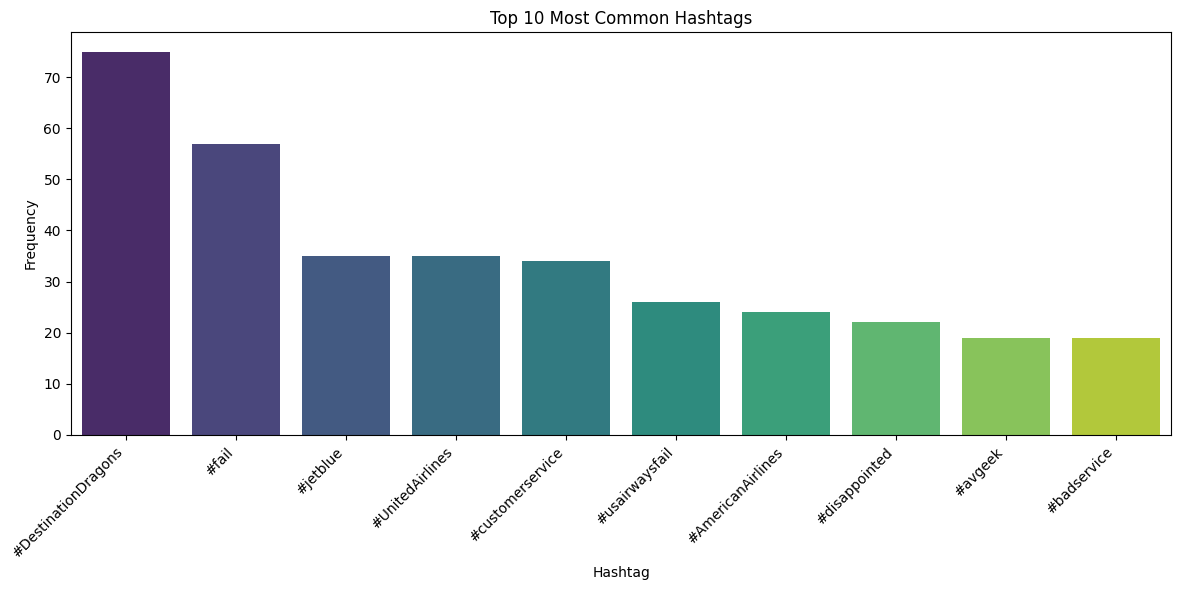

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 most common hashtags from the Counter object
top_10_hashtags = hashtag_frequencies.most_common(10)

# Separate hashtags and their counts for plotting
hashtags = [item[0] for item in top_10_hashtags]
counts = [item[1] for item in top_10_hashtags]

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=hashtags, y=counts, palette='viridis')
plt.title('Top 10 Most Common Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [7]:
import re

def clean_text(text):
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove special characters and numbers, keep spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text.strip()

cleaned_tweets = tweets.apply(clean_text)

print("Original tweets (first 5):")
for i, tweet in enumerate(tweets.head()):
    print(f"{i+1}. {tweet}")

print("\nCleaned tweets (first 5):")
for i, tweet in enumerate(cleaned_tweets.head()):
    print(f"{i+1}. {tweet}")

Original tweets (first 5):
1. @VirginAmerica What @dhepburn said.
2. @VirginAmerica plus you've added commercials to the experience... tacky.
3. @VirginAmerica I didn't today... Must mean I need to take another trip!
4. @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
5. @VirginAmerica and it's a really big bad thing about it

Cleaned tweets (first 5):
1. what  said
2. plus youve added commercials to the experience tacky
3. i didnt today must mean i need to take another trip
4. its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
5. and its a really big bad thing about it


In [8]:
import spacy
nlp = spacy.load("en_core_web_sm")

# Function to tokenize text using spaCy
def tokenize_text(text):
    doc = nlp(text)
    return [token.text for token in doc]

# Apply tokenization to the cleaned_tweets Series
tokenized_tweets = cleaned_tweets.apply(tokenize_text)

# Display the original cleaned tweet and its tokens for the first 5 entries
print("Tokenized Tweets (first 5):")
for i in range(5):
    print(f"Cleaned Tweet {i+1}: {cleaned_tweets.iloc[i]}")
    print(f"Tokens {i+1}:       {tokenized_tweets.iloc[i]}")
    print("-" * 30)

Tokenized Tweets (first 5):
Cleaned Tweet 1: what  said
Tokens 1:       ['what', ' ', 'said']
------------------------------
Cleaned Tweet 2: plus youve added commercials to the experience tacky
Tokens 2:       ['plus', 'you', 've', 'added', 'commercials', 'to', 'the', 'experience', 'tacky']
------------------------------
Cleaned Tweet 3: i didnt today must mean i need to take another trip
Tokens 3:       ['i', 'did', 'nt', 'today', 'must', 'mean', 'i', 'need', 'to', 'take', 'another', 'trip']
------------------------------
Cleaned Tweet 4: its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
Tokens 4:       ['its', 'really', 'aggressive', 'to', 'blast', 'obnoxious', 'entertainment', 'in', 'your', 'guests', 'faces', 'amp', 'they', 'have', 'little', 'recourse']
------------------------------
Cleaned Tweet 5: and its a really big bad thing about it
Tokens 5:       ['and', 'its', 'a', 'really', 'big', 'bad', 'thing', 'about', 'it']
----

In [9]:
import spacy
nlp = spacy.load("en_core_web_sm")

# Function to remove stopwords, punctuation, and space tokens using spaCy
def remove_stopwords_and_spaces(text):
    doc = nlp(text)
    # Filter out stopwords, punctuation, and spaces, and convert to lowercase lemma
    filtered_tokens = [
        token.lemma_.lower() for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space and token.is_alpha
    ]
    return filtered_tokens

# Apply the function to the cleaned_tweets Series
# (Assuming 'cleaned_tweets' is available from a previous step)
tokenized_no_stopwords = cleaned_tweets.apply(remove_stopwords_and_spaces)

# Display the original cleaned tweet and its processed tokens for the first 5 entries
print("Tokens after removing stopwords, punctuation, and spaces (first 5):")
for i in range(5):
    print(f"Cleaned Tweet {i+1}: {cleaned_tweets.iloc[i]}")
    print(f"Processed Tokens {i+1}: {tokenized_no_stopwords.iloc[i]}")
    print("-" * 30)

Tokens after removing stopwords, punctuation, and spaces (first 5):
Cleaned Tweet 1: what  said
Processed Tokens 1: ['say']
------------------------------
Cleaned Tweet 2: plus youve added commercials to the experience tacky
Processed Tokens 2: ['plus', 've', 'add', 'commercial', 'experience', 'tacky']
------------------------------
Cleaned Tweet 3: i didnt today must mean i need to take another trip
Processed Tokens 3: ['not', 'today', 'mean', 'need', 'trip']
------------------------------
Cleaned Tweet 4: its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
Processed Tokens 4: ['aggressive', 'blast', 'obnoxious', 'entertainment', 'guest', 'face', 'amp', 'little', 'recourse']
------------------------------
Cleaned Tweet 5: and its a really big bad thing about it
Processed Tokens 5: ['big', 'bad', 'thing']
------------------------------


In [10]:
# Join the tokens back into a single string for each tweet
rejoined_tweets = tokenized_no_stopwords.apply(lambda x: ' '.join(x))

# Display the original cleaned tweet, processed tokens, and the rejoined text for the first 5 entries
print("Rejoined Tweets (first 5):")
for i in range(5):
    print(f"Cleaned Tweet {i+1}: {cleaned_tweets.iloc[i]}")
    print(f"Processed Tokens {i+1}: {tokenized_no_stopwords.iloc[i]}")
    print(f"Rejoined Text {i+1}:    {rejoined_tweets.iloc[i]}")
    print("-" * 30)

Rejoined Tweets (first 5):
Cleaned Tweet 1: what  said
Processed Tokens 1: ['say']
Rejoined Text 1:    say
------------------------------
Cleaned Tweet 2: plus youve added commercials to the experience tacky
Processed Tokens 2: ['plus', 've', 'add', 'commercial', 'experience', 'tacky']
Rejoined Text 2:    plus ve add commercial experience tacky
------------------------------
Cleaned Tweet 3: i didnt today must mean i need to take another trip
Processed Tokens 3: ['not', 'today', 'mean', 'need', 'trip']
Rejoined Text 3:    not today mean need trip
------------------------------
Cleaned Tweet 4: its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
Processed Tokens 4: ['aggressive', 'blast', 'obnoxious', 'entertainment', 'guest', 'face', 'amp', 'little', 'recourse']
Rejoined Text 4:    aggressive blast obnoxious entertainment guest face amp little recourse
------------------------------
Cleaned Tweet 5: and its a really big bad thing ab

In [11]:
import spacy
nlp = spacy.load("en_core_web_sm")

# Function to perform PoS tagging using spaCy
def pos_tagging_spacy(text):
    doc = nlp(text)
    # Return a list of tuples: (token, PoS_tag)
    return [(token.text, token.pos_) for token in doc]

# Apply the PoS tagging function to the rejoined_tweets Series
pos_tagged_tweets = rejoined_tweets.apply(pos_tagging_spacy)

# Display the rejoined tweet and its PoS tags for the first 5 entries
print("PoS Tagging Results (first 5):")
for i in range(5):
    print(f"Rejoined Text {i+1}: {rejoined_tweets.iloc[i]}")
    print(f"PoS Tags {i+1}:    {pos_tagged_tweets.iloc[i]}")
    print("-" * 30)

PoS Tagging Results (first 5):
Rejoined Text 1: say
PoS Tags 1:    [('say', 'VERB')]
------------------------------
Rejoined Text 2: plus ve add commercial experience tacky
PoS Tags 2:    [('plus', 'CCONJ'), ('ve', 'PART'), ('add', 'VERB'), ('commercial', 'ADJ'), ('experience', 'NOUN'), ('tacky', 'ADV')]
------------------------------
Rejoined Text 3: not today mean need trip
PoS Tags 3:    [('not', 'PART'), ('today', 'NOUN'), ('mean', 'VERB'), ('need', 'NOUN'), ('trip', 'NOUN')]
------------------------------
Rejoined Text 4: aggressive blast obnoxious entertainment guest face amp little recourse
PoS Tags 4:    [('aggressive', 'ADJ'), ('blast', 'NOUN'), ('obnoxious', 'ADJ'), ('entertainment', 'NOUN'), ('guest', 'NOUN'), ('face', 'NOUN'), ('amp', 'ADJ'), ('little', 'ADJ'), ('recourse', 'NOUN')]
------------------------------
Rejoined Text 5: big bad thing
PoS Tags 5:    [('big', 'ADJ'), ('bad', 'ADJ'), ('thing', 'NOUN')]
------------------------------


# Task
Preprocess the `tweets` data using a comprehensive spaCy function that cleans text, tokenizes, lemmatizes, removes stop words and punctuation, and rejoins the processed tokens, then display sample results.

## Define an all-in-one spaCy preprocessing function

### Subtask:
Create a function that takes raw text, applies regex cleaning for mentions and URLs, then uses spaCy for tokenization, lemmatization, stop word and punctuation removal, and finally rejoins the processed tokens into a string.


**Reasoning**:
I will define an all-in-one Python function that performs regex cleaning, tokenization, lemmatization, and removes stopwords, punctuation, and spaces using spaCy, as specified in the instructions. This function will streamline the text preprocessing pipeline.



In [13]:
import re
import spacy
nlp = spacy.load("en_core_web_sm")

def preprocess_text_spacy(text):
    # 1. Regex cleaning for mentions and URLs
    text = re.sub(r'@\w+', '', text) # Remove mentions
    text = re.sub(r'http\S+|www\S+', '', text) # Remove URLs

    # 2. Convert the resulting text to lowercase
    text = text.lower()

    # 3. Process the cleaned text using the loaded spaCy model
    doc = nlp(text)

    # 4. Iterate through each token and apply filtering and lemmatization
    filtered_tokens = [
        token.lemma_.lower() for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space and token.is_alpha
    ]

    # 5. Join the lemmas back into a single string
    return ' '.join(filtered_tokens)

# Apply the function to the original 'tweets' Series to demonstrate
preprocessed_tweets_combined = tweets.apply(preprocess_text_spacy)

# Display the original tweet and the fully preprocessed text for the first 5 entries
print("Original Tweets (first 5):")
for i, tweet in enumerate(tweets.head()):
    print(f"{i+1}. {tweet}")

print("\nFully Preprocessed Tweets (first 5):")
for i, preprocessed_text in enumerate(preprocessed_tweets_combined.head()):
    print(f"{i+1}. {preprocessed_text}")

Original Tweets (first 5):
1. @VirginAmerica What @dhepburn said.
2. @VirginAmerica plus you've added commercials to the experience... tacky.
3. @VirginAmerica I didn't today... Must mean I need to take another trip!
4. @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
5. @VirginAmerica and it's a really big bad thing about it

Fully Preprocessed Tweets (first 5):
1. say
2. plus add commercial experience tacky
3. today mean need trip
4. aggressive blast obnoxious entertainment guest face amp little recourse
5. big bad thing


## Summary:

### Data Analysis Key Findings

*   A comprehensive spaCy preprocessing function, `preprocess_text_spacy`, was successfully developed and implemented.
*   This function effectively performed regex cleaning to remove mentions (`@\w+`) and URLs (`http\S+|www\S+`) from the text.
*   All text was converted to lowercase as part of the preprocessing pipeline.
*   The function utilized spaCy for advanced text processing, including tokenization and lemmatization (converting words to their base forms, e.g., "said" to "say").
*   It filtered out stop words, punctuation, whitespace, and non-alphabetic characters, retaining only meaningful alphabetic lemmas.
*   The function was successfully applied to the `tweets` series, generating a cleaner, processed text series (`preprocessed_tweets_combined`).
*   Sample outputs demonstrated the effectiveness of the preprocessing; for example, the original tweet "@VirginAmerica What @dhepburn said." was transformed into "say", and "@VirginAmerica plus you've added commercials to the experience... tacky." became "plus add commercial experience tacky".

### Insights or Next Steps

*   The created preprocessing function provides a robust and repeatable method for cleaning tweet data, which is crucial for subsequent text analysis tasks like sentiment analysis, topic modeling, or keyword extraction.
*   The preprocessed text can now be used for further feature engineering, such as generating TF-IDF vectors or word embeddings, to prepare the data for machine learning models.
